## 1차 과제 - 고객 유지/이탈 자유 분석
- 주제: 가입 고객 이탈 데이터를 분석하여 기업에 인사이트 제공
- 데이터: Customer Churn Data(train data가 따로 있으나 너무 커서 test data만 사용, 예측 성능 향상을 원한다면 train data 사용해도 무방)
https://www.kaggle.com/datasets/muhammadshahidazeem/customer-churn-dataset?select=customer_churn_dataset-training-master.csv
- 사용 라이브러리: 자유

본 과제는 여러분들의 실력을 확인하고자 출제한 과제로 어떠한 가이드라인도 제공하거나 제약하지 않으며 자유롭게 분석하시면 됩니다.

분석이나 예측 어느 쪽이든 상관없으며 몇가지 조건만 유의하여 주시기 바랍니다.

### 조건
1. 기본적인 분석 과정은 EDA(데이터 탐색) > 전처리 > 분석(예측) 진행 > 결과 해석 으로 진행되지만 약간의 수정 허용
2. EDA 과정에서 최소 2개의 시각화 모형(그래프) 사용
3. 분석 및 예측 시 최소 2개의 모형(모델) 사용
4. 전처리는 자유롭게 진행하며 추가적인 데이터 사용이 필요하다면 허용

In [118]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [119]:
train = pd.read_csv('customer_churn_dataset-testing-master.csv')
train

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,1,22,Female,25,14,4,27,Basic,Monthly,598,9,1
1,2,41,Female,28,28,7,13,Standard,Monthly,584,20,0
2,3,47,Male,27,10,2,29,Premium,Annual,757,21,0
3,4,35,Male,9,12,5,17,Premium,Quarterly,232,18,0
4,5,53,Female,58,24,9,2,Standard,Annual,533,18,0
...,...,...,...,...,...,...,...,...,...,...,...,...
64369,64370,45,Female,33,12,6,21,Basic,Quarterly,947,14,1
64370,64371,37,Male,6,1,5,22,Standard,Annual,923,9,1
64371,64372,25,Male,39,14,8,30,Premium,Monthly,327,20,1
64372,64373,50,Female,18,19,7,22,Standard,Monthly,540,13,1


In [120]:
#타겟데이터 비율 비슷함
train['Churn'].value_counts()

,count
Churn,
0,33881
1,30493


In [121]:
train_churn = train[train['Churn'] == 1]
train_no_churn = train[train['Churn'] == 0]

obj_col = train.select_dtypes(include='object').columns

Payment Delay,Total Spend 에서 제일 큰 차이

In [122]:
train_churn.describe()

,CustomerID,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn
count,30493.000000,30493.000000,30493.000000,30493.000000,30493.000000,30493.000000,30493.000000,30493.000000,30493.0
mean,42566.027121,42.902404,35.515200,14.010593,6.400617,22.334897,519.336143,15.473191,1.0
std,18206.178928,14.058324,15.986912,9.134272,2.724650,6.109532,260.555775,8.658541,0.0
min,1.000000,18.000000,1.000000,1.000000,0.000000,0.000000,100.000000,1.000000,1.0
25%,29463.000000,31.000000,25.000000,5.000000,5.000000,19.000000,291.000000,8.000000,1.0
50%,49128.000000,44.000000,37.000000,14.000000,7.000000,23.000000,491.000000,15.000000,1.0
75%,56751.000000,55.000000,49.000000,22.000000,9.000000,27.000000,745.000000,23.000000,1.0
max,64374.000000,65.000000,60.000000,30.000000,10.000000,30.000000,1000.000000,30.000000,1.0


In [123]:
train_no_churn.describe()

,CustomerID,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn
count,33881.000000,33881.000000,33881.000000,33881.000000,33881.000000,33881.000000,33881.000000,33881.000000,33881.0
mean,22846.794959,41.132700,28.826481,16.042915,4.500753,12.453086,560.541956,15.521944,0.0
std,13177.259783,13.750103,17.442961,8.404856,3.167567,8.308965,259.621052,8.620364,0.0
min,2.000000,18.000000,1.000000,1.000000,0.000000,0.000000,100.000000,1.000000,0.0
25%,11470.000000,29.000000,14.000000,9.000000,2.000000,6.000000,336.000000,8.000000,0.0
50%,22866.000000,41.000000,27.000000,16.000000,4.000000,12.000000,568.000000,16.000000,0.0
75%,34275.000000,53.000000,44.000000,23.000000,7.000000,18.000000,787.000000,23.000000,0.0
max,45684.000000,65.000000,60.000000,30.000000,10.000000,30.000000,1000.000000,30.000000,0.0


전처리

In [124]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder()

train['Gender'].replace({'Female':0, 'Male':1}, inplace=True)


encoded_array = ohe.fit_transform(train[['Contract Length', 'Subscription Type']])
encoded_df = pd.DataFrame(encoded_array.toarray(), columns=ohe.get_feature_names_out(['Contract Length', 'Subscription Type']))
train = pd.concat([train, encoded_df], axis=1)

train.drop(['Contract Length', 'Subscription Type'],axis =1 ,inplace = True)

In [125]:
train

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn,Contract Length_Annual,Contract Length_Monthly,Contract Length_Quarterly,Subscription Type_Basic,Subscription Type_Premium,Subscription Type_Standard
0,1,22,0,25,14,4,27,598,9,1,0.0,1.0,0.0,1.0,0.0,0.0
1,2,41,0,28,28,7,13,584,20,0,0.0,1.0,0.0,0.0,0.0,1.0
2,3,47,1,27,10,2,29,757,21,0,1.0,0.0,0.0,0.0,1.0,0.0
3,4,35,1,9,12,5,17,232,18,0,0.0,0.0,1.0,0.0,1.0,0.0
4,5,53,0,58,24,9,2,533,18,0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64369,64370,45,0,33,12,6,21,947,14,1,0.0,0.0,1.0,1.0,0.0,0.0
64370,64371,37,1,6,1,5,22,923,9,1,1.0,0.0,0.0,0.0,0.0,1.0
64371,64372,25,1,39,14,8,30,327,20,1,0.0,1.0,0.0,0.0,1.0,0.0
64372,64373,50,0,18,19,7,22,540,13,1,0.0,1.0,0.0,0.0,0.0,1.0


그냥 처리없이 로지스틱 회귀만 돌려도 성능 잘 나옴

In [126]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, confusion_matrix, classification_report

X=train.drop(['CustomerID','Churn'],axis=1)
y=train['Churn']

ss = StandardScaler()

X = ss.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


lr = LogisticRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

print(f1_score(y_test, y_pred,pos_label = 1))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.8234047754869204
[[5656 1137]
 [1030 5052]]
              precision    recall  f1-score   support

           0       0.85      0.83      0.84      6793
           1       0.82      0.83      0.82      6082

    accuracy                           0.83     12875
   macro avg       0.83      0.83      0.83     12875
weighted avg       0.83      0.83      0.83     12875



랜덤포레스트는 거의 다 맞춤 (?)

In [127]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

print(f1_score(y_test, y_pred,pos_label = 1))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.9990951715061281
[[6791    2]
 [   9 6073]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6793
           1       1.00      1.00      1.00      6082

    accuracy                           1.00     12875
   macro avg       1.00      1.00      1.00     12875
weighted avg       1.00      1.00      1.00     12875



이상해서 KFold 로 해봄 -- 그래도 성능잘나옴

In [128]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import make_scorer

# StratifiedKFold로 데이터를 여러 번 분할
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


f1_scorer = make_scorer(f1_score, pos_label=1)
f1_scores = cross_val_score(rf, X_train, y_train, cv=skf, scoring=f1_scorer)

print("Cross-Validation F1 Scores: ", f1_scores)
print("Mean F1 Score: ", np.mean(f1_scores))

rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

print(f"Test F1 Score: {f1_score(y_test, y_pred, pos_label=1):.4f}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

Cross-Validation F1 Scores:  [0.99876999 0.99918016 0.99835931 0.99887307 0.99897625]
Mean F1 Score:  0.9988317547479453
Test F1 Score: 0.9994
Confusion Matrix:
[[6793    0]
 [   7 6075]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6793
           1       1.00      1.00      1.00      6082

    accuracy                           1.00     12875
   macro avg       1.00      1.00      1.00     12875
weighted avg       1.00      1.00      1.00     12875



해보고 싶은 전처리 그냥 해봄\
 payment delay :16 \
total spend: 506 기준으로\
 1,0으로 변수바꿈

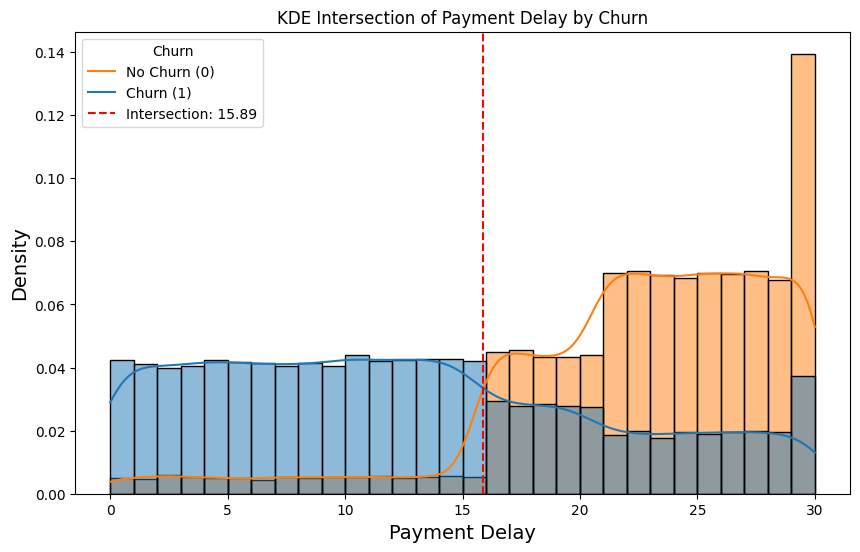

KDE curves intersect at Payment Delay: 15.89


In [129]:
from scipy.stats import gaussian_kde

# KDE 계산
kde_churn_1 = gaussian_kde(train_churn['Payment Delay'])
kde_churn_0 = gaussian_kde(train_no_churn['Payment Delay'])

# Payment Delay의 범위 설정 (최소값에서 최대값까지)
x_vals = np.linspace(min(train['Payment Delay']), max(train['Payment Delay']), 1000)

# KDE 값 계산
kde_vals_churn_1 = kde_churn_1(x_vals)
kde_vals_churn_0 = kde_churn_0(x_vals)

# 두 KDE 차이가 0이 되는 지점 찾기 (교차점)
diff = np.abs(kde_vals_churn_1 - kde_vals_churn_0)
intersection_idx = np.where(diff == np.min(diff))[0][0]
intersection_val = x_vals[intersection_idx]

# 그래프 그리기
plt.figure(figsize=(10,6))

# 히스토그램 + KDE 그래프
sns.histplot(data=train, x='Payment Delay', hue='Churn', kde=True, stat="density", common_norm=False, bins=30)

# 교차점 표시
plt.axvline(intersection_val, color='red', linestyle='--', label=f'Intersection: {intersection_val:.2f}')

# 그래프 설정
plt.xlabel('Payment Delay', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.title('KDE Intersection of Payment Delay by Churn')
plt.legend(title='Churn', labels=['No Churn (0)', 'Churn (1)', f'Intersection: {intersection_val:.2f}'])
plt.show()

# 교차점 출력
print(f"KDE curves intersect at Payment Delay: {intersection_val:.2f}")

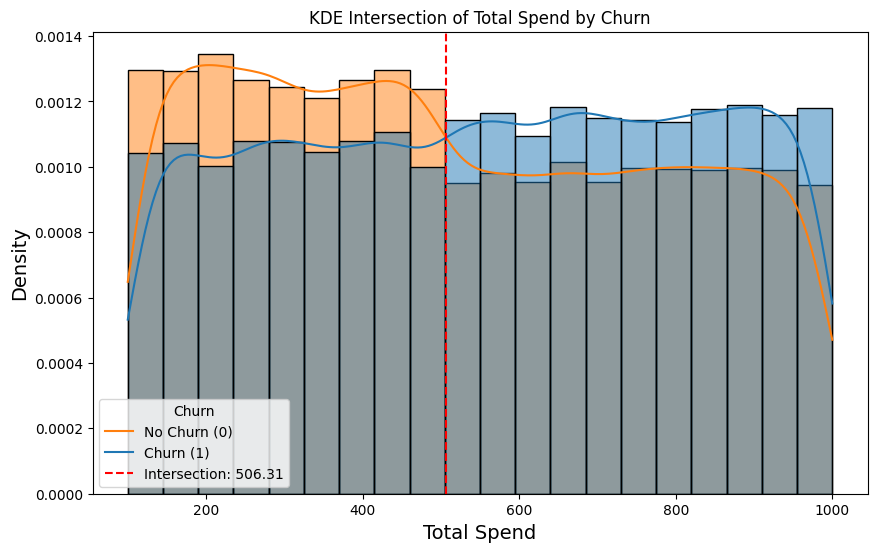

KDE curves intersect at Total Spend: 506.31


In [130]:

# KDE 계산
kde_churn_1 = gaussian_kde(train_churn['Total Spend'])
kde_churn_0 = gaussian_kde(train_no_churn['Total Spend'])

# Total Spend의 범위 설정 (최소값에서 최대값까지)
x_vals = np.linspace(min(train['Total Spend']), max(train['Total Spend']), 1000)

# KDE 값 계산
kde_vals_churn_1 = kde_churn_1(x_vals)
kde_vals_churn_0 = kde_churn_0(x_vals)

# 두 KDE 차이가 0이 되는 지점 찾기 (교차점)
diff = np.abs(kde_vals_churn_1 - kde_vals_churn_0)
intersection_idx = np.where(diff == np.min(diff))[0][0]
intersection_val = x_vals[intersection_idx]

# 그래프 그리기
plt.figure(figsize=(10,6))

# KDE 그래프
sns.histplot(data=train, x='Total Spend', hue='Churn', kde=True, stat="density", common_norm=False, bins=20)

# 교차점 표시
plt.axvline(intersection_val, color='red', linestyle='--', label=f'Intersection: {intersection_val:.2f}')

# 그래프 설정
plt.xlabel('Total Spend', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.title('KDE Intersection of Total Spend by Churn')
plt.legend(title='Churn', labels=['No Churn (0)', 'Churn (1)', f'Intersection: {intersection_val:.2f}'])
plt.show()

# 교차점 출력
print(f"KDE curves intersect at Total Spend: {intersection_val:.2f}")

In [131]:
train['Payment Delay'] = train['Payment Delay'].apply(lambda x: 1 if x >= 16 else 0)
train['Total Spend'] = train['Total Spend'].apply(lambda x: 1 if x >= 506 else 0)

로지스틱회귀의 성능은 좋아졌는데 랜덤포레스트는 애초에 성능이 높았어서 떨어짐

In [132]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, confusion_matrix, classification_report

X=train.drop(['CustomerID','Churn'],axis=1)
y=train['Churn']

ss = StandardScaler()

X = ss.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


lr = LogisticRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

print(f1_score(y_test, y_pred,pos_label = 1))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


0.8452199083380236
[[5694 1099]
 [ 826 5256]]
              precision    recall  f1-score   support

           0       0.87      0.84      0.86      6793
           1       0.83      0.86      0.85      6082

    accuracy                           0.85     12875
   macro avg       0.85      0.85      0.85     12875
weighted avg       0.85      0.85      0.85     12875



In [133]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

print(f1_score(y_test, y_pred,pos_label = 1))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.973459868103587
[[6493  300]
 [  30 6052]]
              precision    recall  f1-score   support

           0       1.00      0.96      0.98      6793
           1       0.95      1.00      0.97      6082

    accuracy                           0.97     12875
   macro avg       0.97      0.98      0.97     12875
weighted avg       0.98      0.97      0.97     12875



결과 해석: 고객이탈 데이터에 타겟값 분포에 따른 큰 특성차이가 있어서 세밀한 전처리 없이도 분류가 잘되는 것 같다.